In [15]:
import prepare_MPS as mps
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit import ClassicalRegister

In [16]:
# Create Random MPS with size 4, bond dimension 4 and physical dimension 2 (qubits)
N = 4
d = 2
chi = 4
phi_final = np.random.rand(chi)
phi_initial = np.random.rand(chi)
A = mps.create_random_tensors(N, chi, d)

In [17]:
# Create the circuit. The 'reg' register corresponds to the 'MPS' register in the picture above
qc, reg = mps.MPS_to_circuit(A, phi_initial, phi_final)

In [18]:
# qc.decompose().decompose().decompose().decompose().decompose().draw(output="mpl")

In [19]:
# Run the circuit on the statevector simulator
psi_out = Statevector(qc).data

# Contract out the ancilla with the known state
psi_out = psi_out.reshape(d**N, chi)
exp = psi_out.dot(phi_final)

# Prepare the MPS classically
thr, _ = mps.create_statevector(A, phi_initial, phi_final, qiskit_ordering=True)

# Compare the resulting vectors (fixing phase and normalization)
exp = mps.normalize(mps.extract_phase(exp))
thr = mps.normalize(mps.extract_phase(thr))

print("The MPS is \n {}".format(thr.round(5)))
print("The statevector produced by the circuit is \n {}".format(exp.round(5)))

The MPS is 
 [0.2818 +0.j      0.29168-0.05765j 0.25992+0.03513j 0.31145-0.01283j
 0.26466+0.00827j 0.28265-0.04567j 0.22396+0.03578j 0.2725 -0.00402j
 0.23187+0.03142j 0.24738-0.0133j  0.20698+0.0547j  0.2538 +0.02098j
 0.19866+0.04443j 0.22063+0.00661j 0.16099+0.05611j 0.2031 +0.03379j]
The statevector produced by the circuit is 
 [0.2818 -0.j      0.29168-0.05765j 0.25992+0.03513j 0.31145-0.01283j
 0.26466+0.00827j 0.28265-0.04567j 0.22396+0.03578j 0.2725 -0.00402j
 0.23187+0.03142j 0.24738-0.0133j  0.20698+0.0547j  0.2538 +0.02098j
 0.19866+0.04443j 0.22063+0.00661j 0.16099+0.05611j 0.2031 +0.03379j]


In [20]:
N = 5
chi = 2

# The following is the standard representation of a GHZ state in terms of MPS
phi_initial = np.array([1, 1])
phi_final = np.array([1, 1])
T = np.zeros((d, chi, chi))
T[0, 0, 0] = 1
T[1, 1, 1] = 1
A = []
for _ in range(N):
    A.append(T)

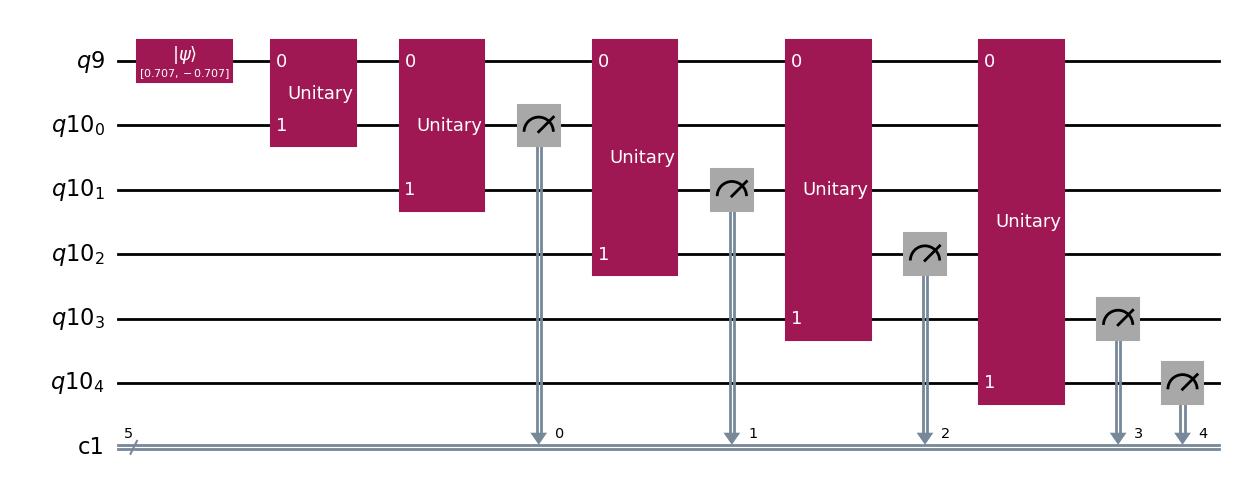

In [21]:
# Create the circuit, store the relevant wavefunction is register 'reg' and measure
qc, reg = mps.MPS_to_circuit(A, phi_initial, phi_final)
creg = ClassicalRegister(N)
qc.add_register(creg)
qc.measure(reg, creg)

qc.draw(output="mpl")

157

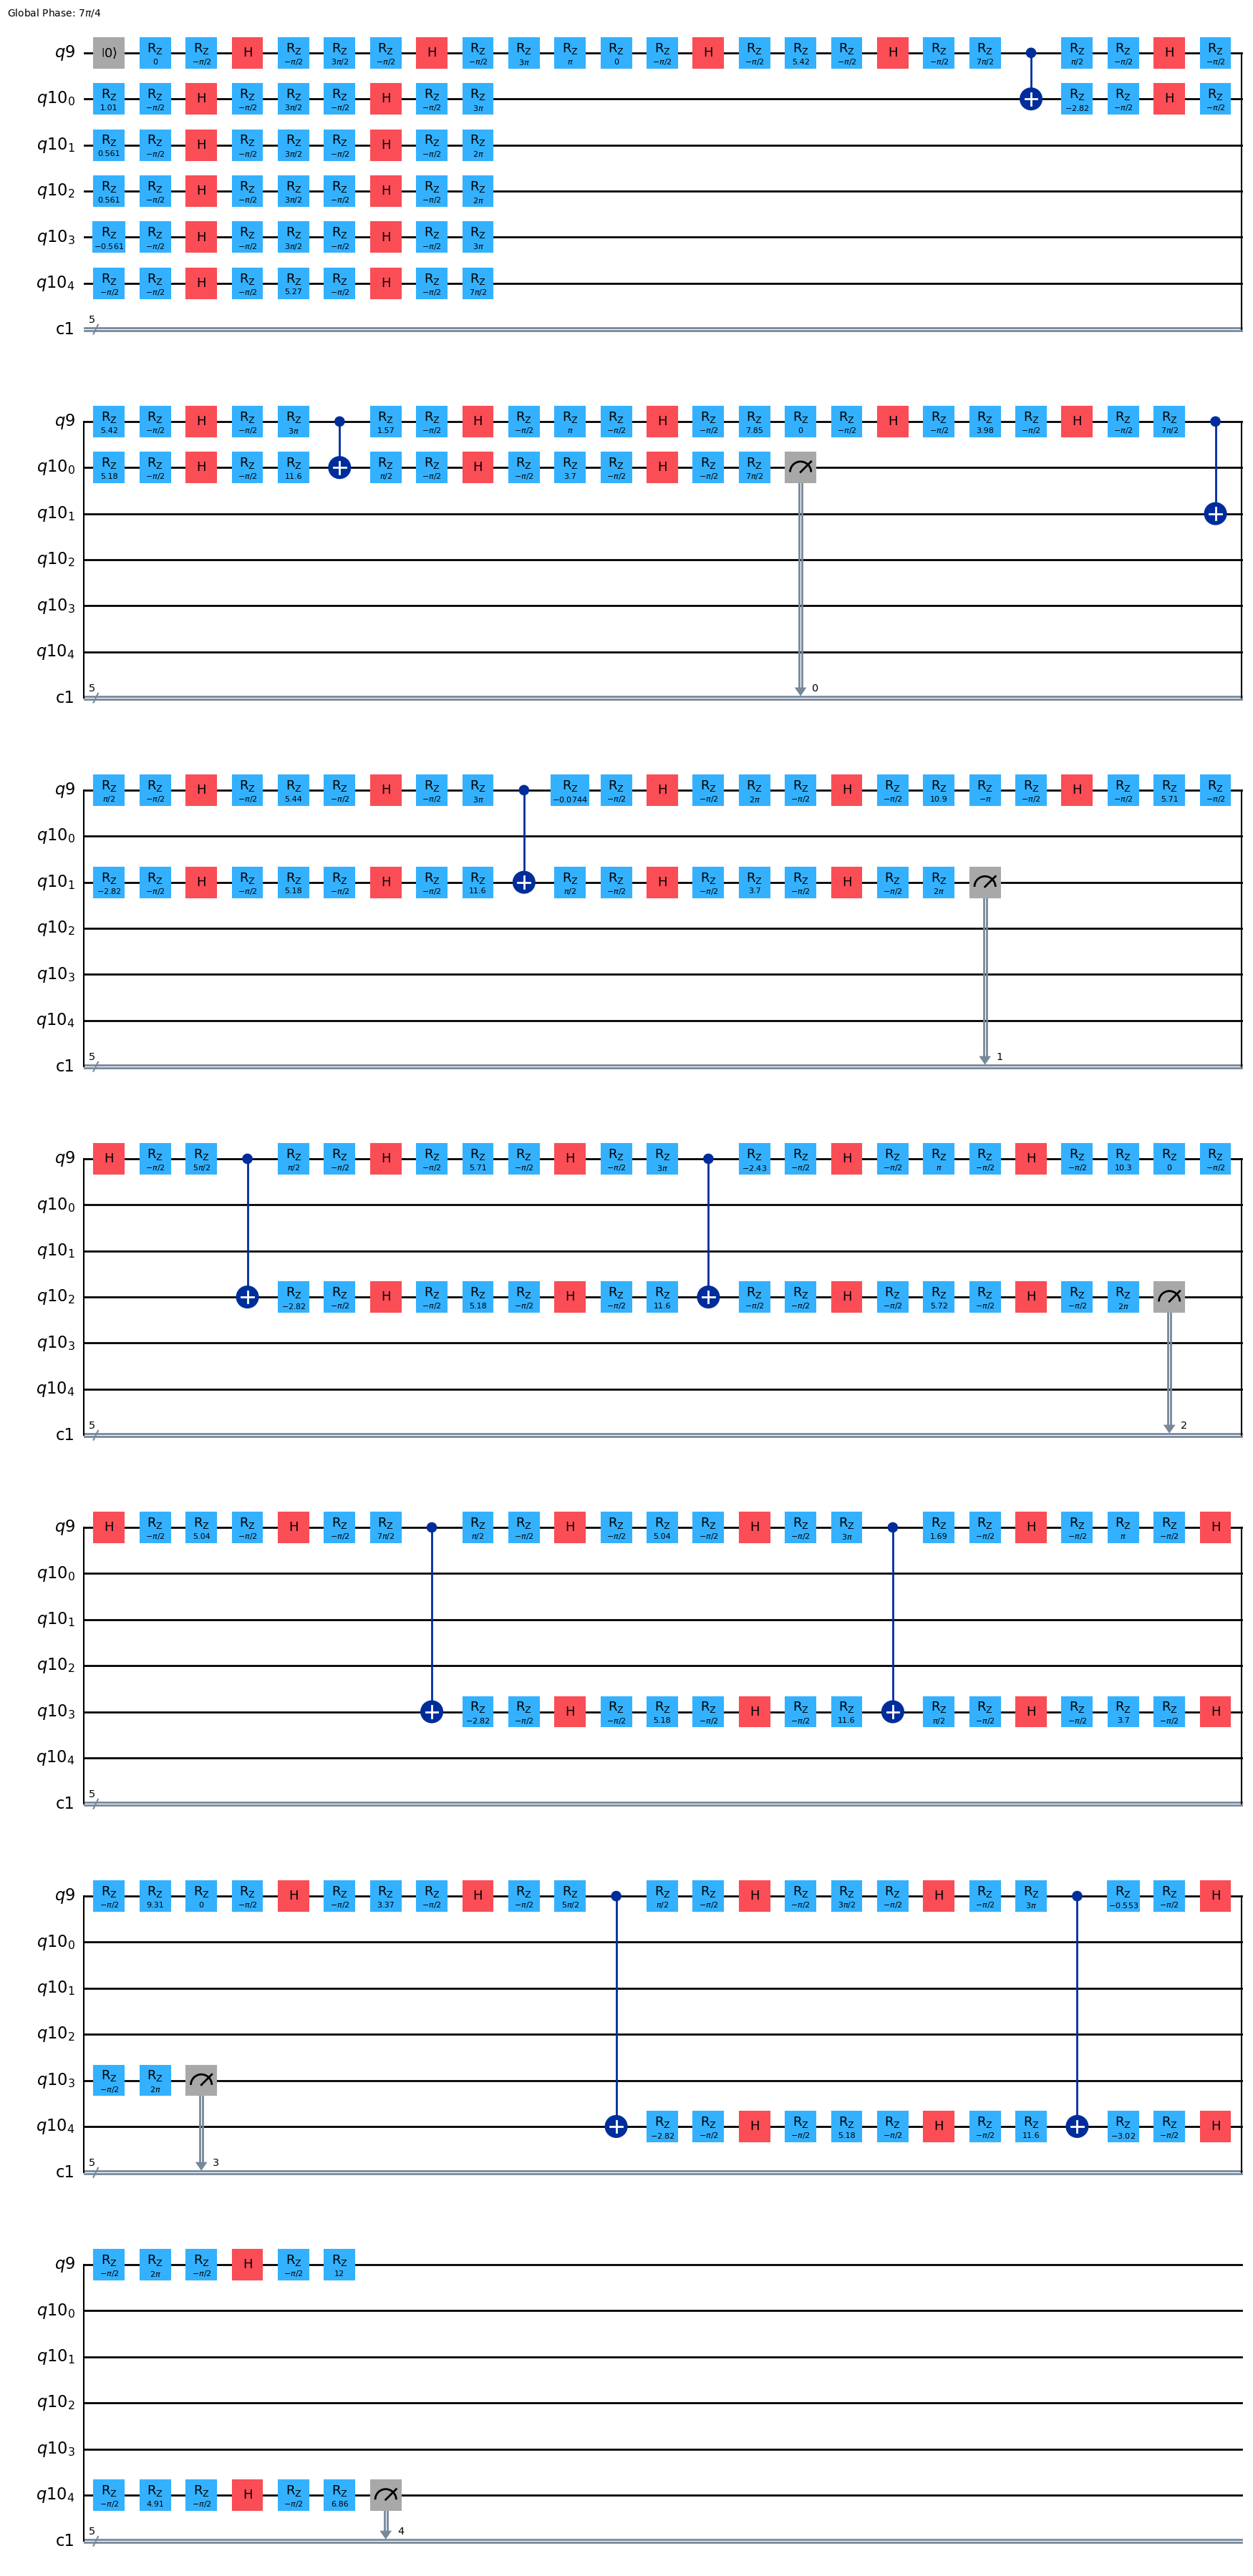

In [25]:
from qiskit.compiler import transpile

qc_transpiled = transpile(qc, basis_gates=["x", "cx", "h", "rz"])
display(qc_transpiled.depth())
qc_transpiled.draw(output="mpl")

{'00000': 492, '11111': 508}


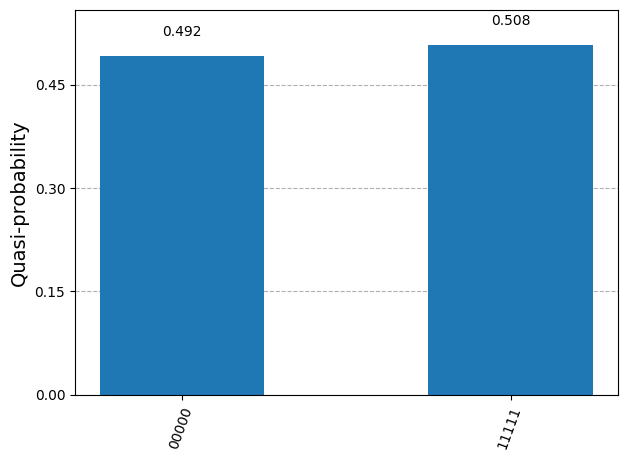

In [22]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_distribution

job = AerSimulator().run(qc, shots=1000)
counts = job.result().get_counts(qc)
print(counts)
plot_histogram(counts)
plot_distribution(counts)